In [69]:
import pandas as pd
import matplotlib.pyplot as plt



In [70]:
df = pd.read_csv("shopping_behavior_updated.csv")
df = df[df['Location'] == 'Massachusetts'].copy()

In [71]:
df['Incentive_Type'] = df.apply(
    lambda r: 'Used Discount/Promo' if r['Discount Applied'] == 'Yes' and r['Promo Code Used'] == 'Yes'
    else 'Used Discount Only' if r['Discount Applied'] == 'Yes'
    else 'Used Promo Only' if r['Promo Code Used'] == 'Yes'
    else 'Used Neither', axis=1
)

In [72]:
categories = ['Used Discount/Promo', 'Used Discount Only', 'Used Promo Only', 'Did not use Discount/Promo']


In [73]:
data = [df.loc[df['Incentive_Type'] == cat, 'Purchase Amount (USD)'] for cat in df['Incentive_Type'].unique()]


/var/folders/6v/yql7fflj6tlg6tsfmbjr10k00000gn/T/ipykernel_80819/690154716.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



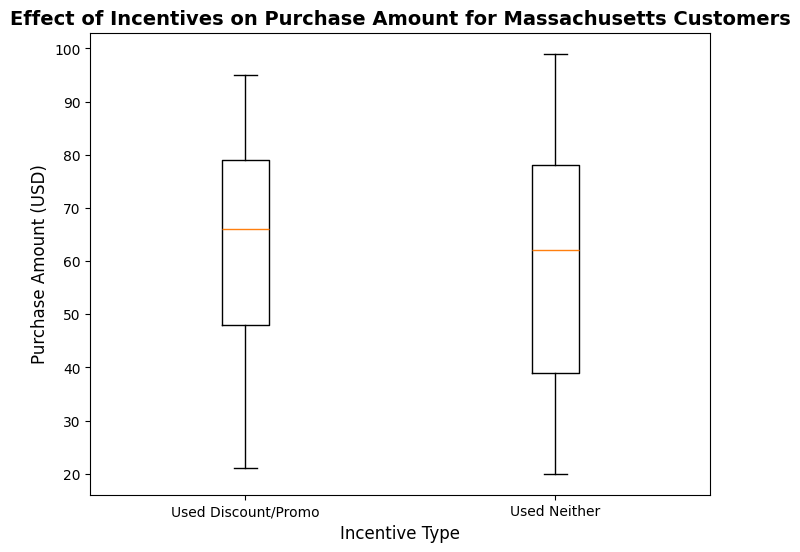



SUMMARY STATISTICS TABLE:
                     count   mean    std   min   25%   50%   75%   max
Incentive_Type                                                        
Used Discount/Promo   35.0  61.94  22.18  21.0  48.0  66.0  79.0  95.0
Used Neither          37.0  59.89  23.79  20.0  39.0  62.0  78.0  99.0


In [74]:
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=df['Incentive_Type'].unique())
plt.title('Effect of Incentives on Purchase Amount for Massachusetts Customers', fontsize=14, weight='bold')
plt.xlabel('Incentive Type', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.show()

print("\n\nSUMMARY STATISTICS TABLE:")
summary = df.groupby('Incentive_Type')['Purchase Amount (USD)'].describe()
print(summary.round(2))



